## <h1 style="color: blue;">Python Refresher Journey</h1>

In [1]:
# Use lists when you need to modify data.
# List (mutable)

medications = ["Aspirin", "Paracetamol", "Ibuprofen"]
medications.append("Amoxicillin")
print("Medication List:", medications)

Medication List: ['Aspirin', 'Paracetamol', 'Ibuprofen', 'Amoxicillin']


In [2]:
# Use tuples when you want fixed values.
# Tuple (immutable)

vital_signs = ("Temperature", "Pulse", "Respiration")
print("Vital Signs:", vital_signs)

Vital Signs: ('Temperature', 'Pulse', 'Respiration')


In [4]:
# Patient Age Filter

patients = [
    ["John", 60, "M", "diabetes"],
    ["Jane", 49, "F", "asthma"],
    ["Ayo", 65, "M", "hypertension"],
    ["Lila", 33, "F", "none"]
]

# Filter: age > 50 and has diabetes
for patient in patients:
    name, age, gender, condition = patient
    if age > 50 and condition == "diabetes":
        print(f"{name} ({gender}) has {condition} and is over 50.")


John (M) has diabetes and is over 50.


In [5]:
# Dictionaries and Sets

# Dictionary
patient_record = {
    "name": "John",
    "age": 60,
    "gender": "M",
    "condition": "diabetes"
}
print("Patient Name:", patient_record["name"])

Patient Name: John


In [6]:
# Set (unique values)

departments = {"cardiology", "orthopedics", "cardiology"}
print("Unique Departments:", departments)

Unique Departments: {'orthopedics', 'cardiology'}


In [7]:
# Dictionary Filter

patients = [
    {"name": "John", "age": 60, "gender": "M", "condition": "diabetes"},
    {"name": "Jane", "age": 49, "gender": "F", "condition": "asthma"},
    {"name": "Ayo", "age": 65, "gender": "M", "condition": "hypertension"},
    {"name": "Lila", "age": 33, "gender": "F", "condition": "none"}
]

# Filter females under 50
for p in patients:
    if p["gender"] == "F" and p["age"] < 50:
        print(f"{p['name']} is a female under 50 with {p['condition']}")

Jane is a female under 50 with asthma
Lila is a female under 50 with none


In [8]:
#  File Handling

# Write a file
with open("patients.txt", "w") as file:
    file.write("Name,Age,Condition\n")
    for p in patients:
        file.write(f"{p['name']},{p['age']},{p['condition']}\n")

In [9]:
# Read a file
with open("patients.txt", "r") as file:
    data = file.readlines()
    for line in data[1:]:  # skip header
        print("Line:", line.strip())

Line: John,60,diabetes
Line: Jane,49,asthma
Line: Ayo,65,hypertension
Line: Lila,33,none


In [10]:
# Functions & Loops

def filter_patients(data, min_age):
    return [p for p in data if p["age"] >= min_age]

result = filter_patients(patients, 50)
for r in result:
    print(f"{r['name']} is over 50.")

John is over 50.
Ayo is over 50.


In [14]:
# Exception Handling Practice

try:
    age = int(input("Enter patient age: "))
    if age < 0:
        raise ValueError("Age must be positive")
    print(f"Entered age: {age}")
except ValueError as e:
    print("Error:", e)

Enter patient age:  -37


Error: Age must be positive


In [48]:
# Mini-Project
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process data
patients = []
with open("simulated_patients.csv", newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        try:
            name = row["name"]
            weight = float(row["weight_pounds"])
            height = float(row["height_inches"])
            age = int(row["age"])
            condition = row["condition"].strip().lower()

            # Calculate BMI
            bmi = (weight * 703) / (height ** 2)

            patients.append({
                "name": name,
                "weight": weight,
                "height": height,
                "age": age,
                "condition": condition,
                "bmi": round(bmi, 2)
            })

        except (ValueError, KeyError):
            continue  # Skip rows with missing or malformed data

# Convert to DataFrame
df = pd.DataFrame(patients)

# Sort within each condition group by BMI descending
df_sorted = df.sort_values(by=["condition", "bmi"], ascending=[True, False])

# Display each condition's patients in a clean table
for condition, group_df in df_sorted.groupby("condition"):
    print(f"\n=== Condition: {condition.upper()} ===")
    print(group_df.reset_index(drop=True).to_string(index=False))


=== Condition: ASTHMA ===
      name  weight  height  age condition   bmi
Patient123   292.2    58.7   37    asthma 59.62
Patient136   276.5    58.5   58    asthma 56.80
Patient192   294.8    64.4   45    asthma 49.97
 Patient24   283.8    65.3   77    asthma 46.79
 Patient83   267.5    63.9   75    asthma 46.06
 Patient58   280.6    67.6   61    asthma 43.17
 Patient99   289.7    69.0   45    asthma 42.78
 Patient50   243.9    63.4   42    asthma 42.66
Patient126   254.8    64.8   44    asthma 42.66
Patient144   251.2    66.4   78    asthma 40.05
 Patient60   213.2    61.3   74    asthma 39.89
Patient113   201.6    60.2   68    asthma 39.11
Patient163   206.4    61.0   85    asthma 38.99
 Patient42   217.3    62.7   82    asthma 38.86
Patient108   286.8    73.0   69    asthma 37.83
Patient127   292.6    74.0   49    asthma 37.56
Patient164   273.5    72.9   61    asthma 36.18
 Patient35   193.8    61.4   61    asthma 36.14
 Patient82   291.2    76.0   61    asthma 35.44
 Patient65   

In [49]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    elif bmi < 35:
        return "Obese I"
    elif bmi < 40:
        return "Obese II"
    else:
        return "Obese III"

# Apply to dataframe
df["bmi_category"] = df["bmi"].apply(categorize_bmi)

In [50]:
print(df[["name", "bmi", "bmi_category", "condition"]].sort_values(by="bmi"))

           name    bmi bmi_category     condition
11    Patient12  16.14  Underweight        asthma
30    Patient31  16.58  Underweight        asthma
18    Patient19  17.11  Underweight  hypertension
145  Patient146  17.14  Underweight          none
124  Patient125  17.55  Underweight  hypertension
..          ...    ...          ...           ...
79    Patient80  54.05    Obese III          none
74    Patient75  55.99    Obese III      diabetes
175  Patient176  56.78    Obese III          none
135  Patient136  56.80    Obese III        asthma
122  Patient123  59.62    Obese III        asthma

[200 rows x 4 columns]


In [51]:
bmi_grouped = df.groupby("bmi_category").size().reset_index(name="count")
print(bmi_grouped)

  bmi_category  count
0       Normal     37
1      Obese I     41
2     Obese II     31
3    Obese III     48
4   Overweight     36
5  Underweight      7


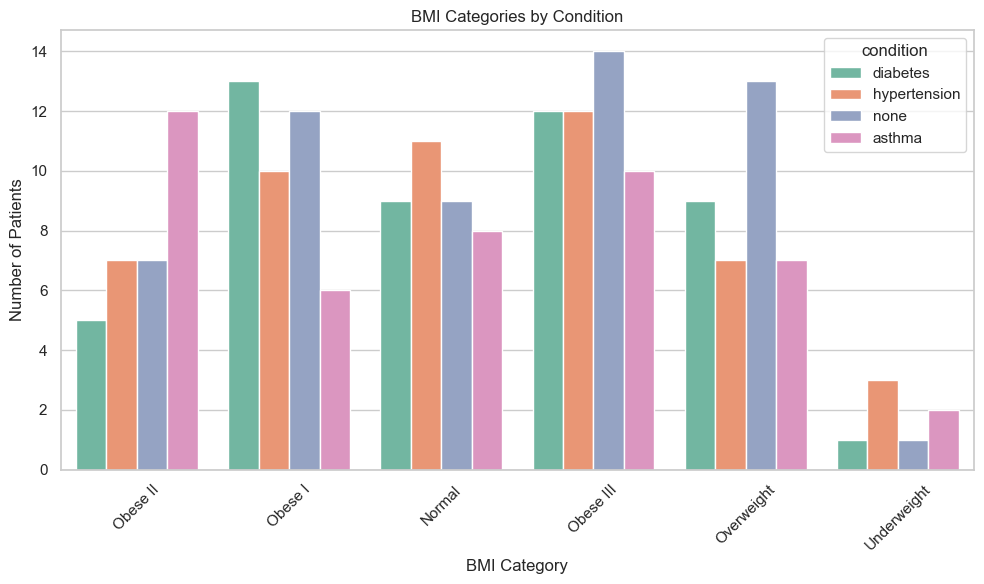

In [52]:
# Plot BMI categories by condition

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="bmi_category", hue="condition", palette="Set2")
plt.title("BMI Categories by Condition")
plt.xlabel("BMI Category")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

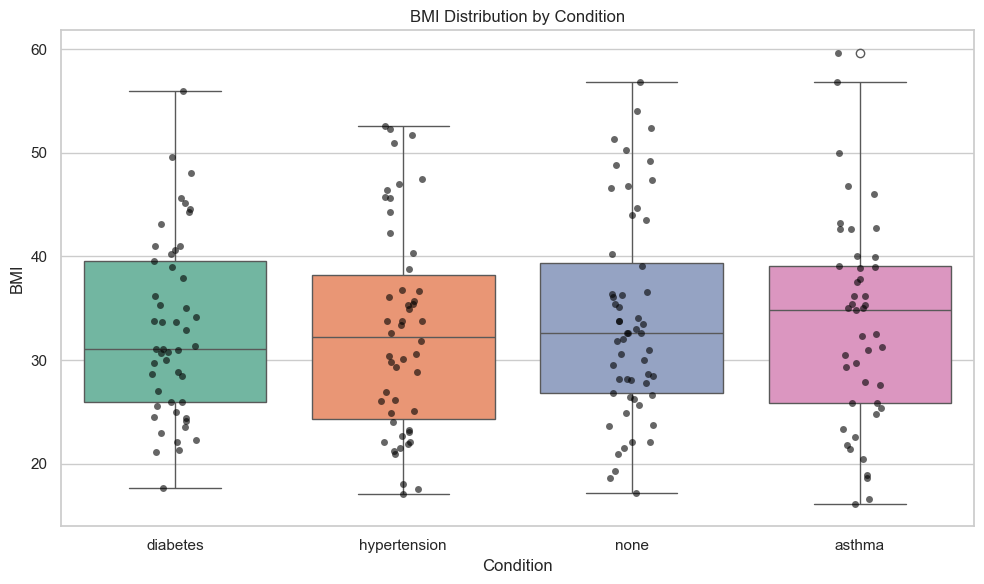

In [53]:
# Plot BMI distribution by condition

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="condition", y="bmi", data=df, hue="condition", palette="Set2", legend=False)
sns.stripplot(x="condition", y="bmi", data=df, color="black", alpha=0.6, jitter=True)
plt.title("BMI Distribution by Condition")
plt.ylabel("BMI")
plt.xlabel("Condition")
plt.tight_layout()
plt.show()

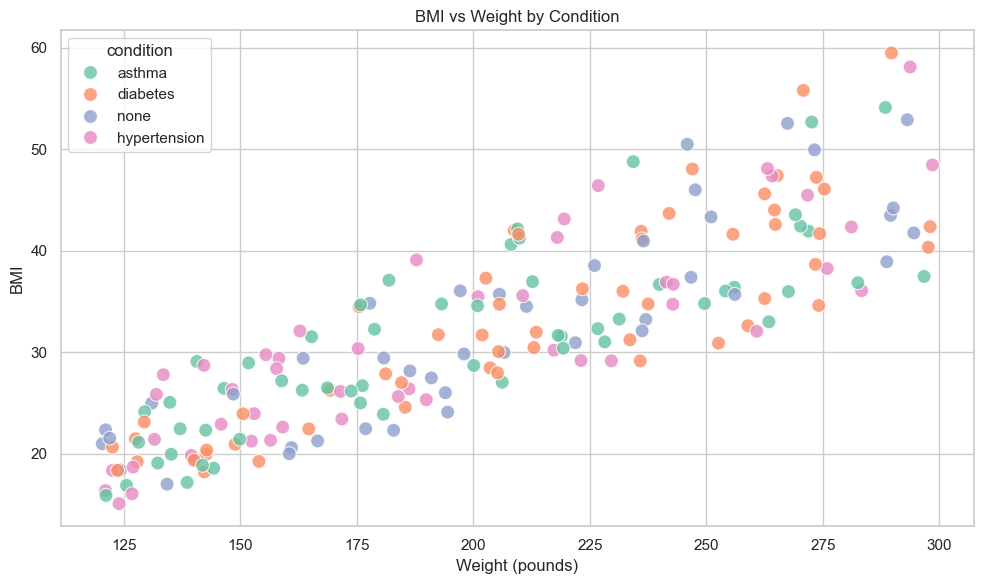

In [40]:
# Plot BMI Vs Weight by all condition

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="weight", y="bmi", hue="condition", palette="Set2", s=100, alpha=0.8)
plt.title("BMI vs Weight by Condition")
plt.xlabel("Weight (pounds)")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
plt.show()

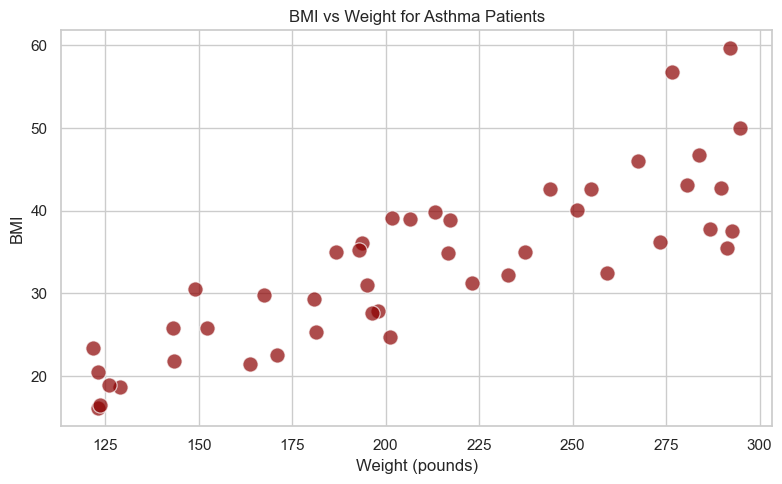

In [54]:
#Plot BMI Vs. Weight by Asthma

asthma_df = df[df["condition"] == "asthma"]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=asthma_df, x="weight", y="bmi", color="darkred", s=120, alpha=0.7)
plt.title("BMI vs Weight for Asthma Patients")
plt.xlabel("Weight (pounds)")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
plt.show()

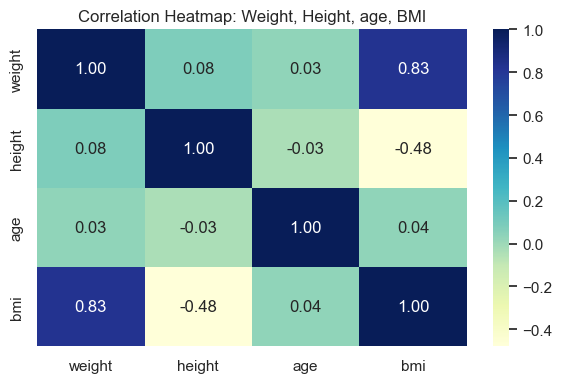

In [55]:
# Compute correlation matrix for numeric features
corr = df[["weight", "height", "age", "bmi"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap: Weight, Height, age, BMI")
plt.tight_layout()
plt.show()

In [ ]:
# Assignment: Go further for age vs BMI analysis